Saving fake_news_data.csv to fake_news_data.csv
🔹 Dataset Loaded Successfully!
                                               text label
0      Government passes new education reform bill.  real
1       Central Bank lowers interest rates by 0.5%.  real
2           Economy grows 5.4% in the last quarter.  real
3  Man turns invisible after drinking energy drink.  fake
4              Moon made of cheese, says new study.  fake

📊 Class Distribution:
label
real    100
fake    100
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



📋 Classification Report:
               precision    recall  f1-score   support

        fake       1.00      1.00      1.00        22
        real       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


✅ Accuracy Score: 1.0


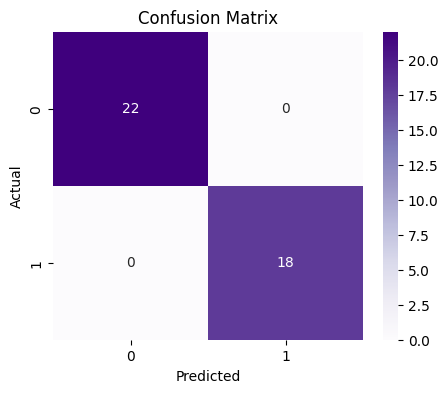

In [1]:
# ✅ Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
import string
import re

# ✅ Step 2: Upload the Dataset
from google.colab import files
uploaded = files.upload()

import io
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("🔹 Dataset Loaded Successfully!")
print(df.head())

# ✅ Step 3: Basic EDA
print("\n📊 Class Distribution:")
print(df['label'].value_counts())

# ✅ Step 4: Preprocessing Function
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"\[.*?\]", "", text)  # remove brackets
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"[^a-zA-Z]", " ", text)  # remove punctuation and digits
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# ✅ Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.7)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# ✅ Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 7: Model Training
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train, y_train)

# ✅ Step 8: Predictions and Evaluation
y_pred = model.predict(X_test)
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# ✅ Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Step 10: Try It on Custom Input
def predict_news(news):
    news_clean = clean_text(news)
    vector = vectorizer.transform([news_clean])
    prediction = model.predict(vector)
    print(f"🧠 The news is predicted to be: **{prediction[0]}**")

# Example:
# predict_news("Breaking: COVID-19 vaccine approved by WHO for emergency use!")
